# Lesson 7.04 PCA

## Overview
- `PCA` stands for Principal Component Analysis
- It is an unsupervised ML algorithm that discovers the relationships between variables and reduces variables down to uncorrelated and synthetic representations called `principal components`
- In other words, `principal components` are synthetic representations of a data set


## Setting up for `PCA`

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML 
from pylab import rcParams

from sklearn import datasets

In [2]:
from sklearn.decomposition import PCA

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Load iris dataset

In [4]:
iris = datasets.load_iris()
X = iris.data
variable_names = iris.feature_names

# display first 10 rows of X data
X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

### Build `PCA` model

In [5]:
# instantiate a PCA object
pca = PCA()

# Principal Components will be stored in a new object called iris_pca
iris_pca = pca.fit_transform(X)

### Interpret Results

- The explained variance ratio tells us how much information is compressed into the X features a.k.a components
- When deciding how many components to keep, look at the % of cumulative variance
    - ensure at least 70% of the original data is retained i.e. cumulative variance >= 70%
- We do not want 100% cumulative variance since some of the components are tied up with noise, info redundance, or outliers
- Our goal with PCA is to remove all these "junk" mentioned above and retain only fundamental or principal components that matter

In [6]:
# explained variance of all components in data set will add up to 1
# in other words, 100% of the variance in the data set is captured by these 4 components
pca.explained_variance_ratio_.sum()

1.0

In [7]:
# useful for assessing how much variance is explained by the components that were found
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

- First component explained 92% of the data set's variance which means it holds 92% of the information in the data in one principal component
- By taking the first 2 components (92% + 5%), we only lose 3% of the data set's info which could be the "junk" info that we want to remove in our data set
- In other words, the first 2 components contain 97% of the original info in the data set and we can be satistied with a decision to keep just these 2 components

### Visualise Results

In [8]:
# load principal components (rows) and variables (columns) into a data frame
# Each cell in the DataFrame represents the influence / contribution of a variable to a given PC

# The highest contributing variables for PC1 comprises of Petal Length
# The highest contributing variables for PC2 comprises of sepal width
# The highest contributing variables for PC3 comprises of sepal length 
# The highest contributing variables for PC4 comprises of petal width
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


<AxesSubplot:>

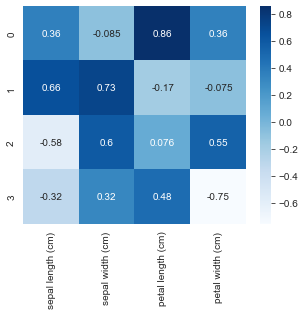

In [9]:
# assess how data set's variables influence each principal components
sb.heatmap(comps, cmap="Blues", annot=True)

- Components 1 (index=0) and 2 (index=1) contained 97% of the data set's total information
- Based on the above, we decided to keep only these 2 components
- Results from matrix above, shows that:
    - **Principal Component 1** is strongly influenced by petal length, moderately influenced by sepal length and petal width, and slightly influenced by sepal width
    - **Principal Component 2** is strongly influenced by sepal length and sepal width, and slightly influenced by petal length and petal width
    
    
#### FAQ: How do you use components once you have isolated them?
- Use these components as input variables for other ML models. Read more at this [link](https://towardsdatascience.com/principal-component-analysis-with-python-an-example-for-beginners-by-a-beginner-ac052eff45c)
- For example, you could use these 2 components as inputs for a classifier in order to predict flower species labels for unseen data
- Recall that ideally we want to build the most accurate models possible with the fewest possible fundamental features